In [1]:
import dask
import dask.dataframe as dd
from dask import delayed
from dask.distributed import Client, wait

In [2]:
client = Client()

client

<Client: 'tcp://127.0.0.1:34011' processes=16 threads=128, memory=570.33 GiB>

In [15]:
# log_dir = "/p/gpfs1/iopp/recorder_app_logs/cm1/nodes-32/workflow-4/_parquet"
log_dir = "/p/gpfs1/iopp/recorder_app_logs/montage/nodes-32/_parquet"

ddf = dd.read_parquet(f"{log_dir}/*.parquet")

ddf

Dask DataFrame Structure:
                index   proc   rank thread_id    cat io_cat   tstart     tend func_id  level hostname     app filename   size bandwidth duration   tmid file_id proc_id
npartitions=16                                                                                                                                                         
                int64  int64  int32     int32  int32  int32  float32  float32  object  int32   object  object   object  int64   float32  float32  int64   int64   int64
                  ...    ...    ...       ...    ...    ...      ...      ...     ...    ...      ...     ...      ...    ...       ...      ...    ...     ...     ...
...               ...    ...    ...       ...    ...    ...      ...      ...     ...    ...      ...     ...      ...    ...       ...      ...    ...     ...     ...
                  ...    ...    ...       ...    ...    ...      ...      ...     ...    ...      ...     ...      ...    ...       ...      ...    ...     ...     ...
                  ...    ...    ...       ...    ...    ...      ...      ...     ...    ...      ...     ...      ...    ...       ...      ...    ...     ...     ...
Dask Name: read-parquet, 16 tasks

In [16]:
indexed_ddf = ddf.set_index(['proc_id']).compute()

In [17]:
indexed_ddf.index

Int64Index([ 115744974875708724,  115744974875708724,  115744974875708724,
             115744974875708724,  115744974875708724,  115744974875708724,
             115744974875708724,  115744974875708724,  115744974875708724,
             115744974875708724,
            ...
            9060729382066249156, 9060729382066249156, 9060729382066249156,
            9060729382066249156, 9060729382066249156, 9060729382066249156,
            9060729382066249156, 9060729382066249156, 9060729382066249156,
            9060729382066249156],
           dtype='int64', name='proc_id', length=4889291)

In [26]:
indexed_ddf.index.nunique()

204

In [39]:
indexed_ddf.index.min()

115744974875708724

In [18]:
proc_ddf = indexed_ddf.groupby(indexed_ddf.index)['hostname', 'rank', 'thread_id'].min()

proc_ddf

/usr/WS2/iopp/projects/vani-analysis-tool/virenv-lassen/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


hostname  rank  thread_id
proc_id                                        
115744974875708724   lassen575     0     314672
115745060775054644   lassen575     0     314672
115745112314660756   lassen575     0     313232
115745739379887412   lassen575     0     314672
115745911180024260   lassen575    22     317888
...                        ...   ...        ...
9060728299735931332  lassen528    22     317888
9060728299735996868  lassen528    23     317888
9060728299736062404  lassen528    24     317888
9060728299736127940  lassen528    25     317888
9060729382066249156  lassen528     0     318912

[204 rows x 3 columns]

In [28]:
proc_ddf['hostname'].nunique()

32

In [30]:
proc_ddf.index

Int64Index([ 115744974875708724,  115745060775054644,  115745112314660756,
             115745739379887412,  115745911180024260,  115745911180089796,
             115745911180155332,  115745911180220868,  115747461661777348,
             145422717854731572,
            ...
            8716199904583666996, 8716200042022619028, 8716201128649350596,
            9060727436446059828, 9060727573885011860, 9060728299735931332,
            9060728299735996868, 9060728299736062404, 9060728299736127940,
            9060729382066249156],
           dtype='int64', name='proc_id', length=204)

In [22]:
proc_id_list = proc_ddf.index.unique()
print("proc_id_list", proc_id_list)
mask = (2 ** 15 - 1) << 48
# print("{0:b}".format(mask))
hostname_id_set = set()
for proc in proc_id_list:
    hostname_id_set.add(proc & mask)
hostname_id_list = list(hostname_id_set)
hostname_id_list.sort()
print("hostname_id_list", hostname_id_list)
print("hostname_id_list len", len(hostname_id_list))

proc_id_list Int64Index([ 115744974875708724,  115745060775054644,  115745112314660756,
             115745739379887412,  115745911180024260,  115745911180089796,
             115745911180155332,  115745911180220868,  115747461661777348,
             145422717854731572,
            ...
            8716199904583666996, 8716200042022619028, 8716201128649350596,
            9060727436446059828, 9060727573885011860, 9060728299735931332,
            9060728299735996868, 9060728299736062404, 9060728299736127940,
            9060729382066249156],
           dtype='int64', name='proc_id', length=204)
hostname_id_list [115686215428079616, 145241087982698496, 226024406298656768, 243757329831428096, 267964177828544512, 1029635464807579648, 1134625631120654336, 1458040379361198080, 1701516234215915520, 1705175408913154048, 2402670401202159616, 2439825098127966208, 2463750471148371968, 4459689531003633664, 5012224910286651392, 5670031930859454464, 5841450191676243968, 5901122886738903040, 603200875

In [24]:
import math
depth = math.ceil(math.sqrt(len(hostname_id_list)))
print("depth", depth)
iterations = list(range(0, depth + 1))
print("iterations", iterations)
iterations.reverse()

depth 6
iterations [0, 1, 2, 3, 4, 5, 6]


In [7]:
ddf.head(30)

index  proc  rank  thread_id  cat  io_cat    tstart      tend    func_id  \
0       1     1     0     322192    0       3  2.823260  2.823267    __xstat   
1       2     1     0     322192    0       3  2.823293  2.823305       open   
2       3     1     0     322192    0       3  2.823371  2.823373   __fxstat   
3       4     1     0     322192    0       1  2.823390  2.823399       read   
4       5     1     0     322192    0       3  2.823490  2.823494      close   
5       6     1     0     322192    0       3  2.823522  2.823524    __xstat   
6       7     1     0     322192    0       3  2.823538  2.844243       open   
7       8     1     0     322192    0       3  2.844259  2.844260   __fxstat   
8       9     1     0     322192    0       3  2.844264  2.844265   __fxstat   
9      10     1     0     322192    0       3  2.844290  2.844293      lseek   
10     11     1     0     322192    0       3  2.844297  2.844306  ftruncate   
11     12     1     0     322192    0       2  3.099647  3.099776      write   
12     13     1     0     322192    0       3  3.099782  3.099844      close   
13     14     1     0     322192    0       3  3.101861  3.101868    __xstat   
14     15     1     0     322192    0       3  3.101888  3.101903       open   
15     16     1     0     322192    0       3  3.101982  3.101984   __fxstat   
16     17     1     0     322192    0       1  3.102013  3.102023       read   
17     18     1     0     322192    0       3  3.102238  3.102243      close   
18     19     1     0     322192    0       3  3.374498  3.374502    __xstat   
19     20     1     0     322192    0       3  3.374514  3.376874       open   
20     21     1     0     322192    0       3  3.376892  3.376893   __fxstat   
21     22     1     0     322192    0       3  3.376897  3.376899   __fxstat   
22     23     1     0     322192    0       3  3.376920  3.376922      lseek   
23     24     1     0     322192    0       3  3.376926  3.376935  ftruncate   
24     25     1     0     322192    0       2  3.376984  3.377056      write   
25     26     1     0     322192    0       3  3.377060  3.377067      close   
26     27     1     0     322192    0       3  3.413562  3.413568    __xstat   
27     28     1     0     322192    0       3  3.413589  3.413703       open   
28     29     1     0     322192    0       3  3.413784  3.413786   __fxstat   
29     30     1     0     322192    0       1  3.413794  3.415101       read   

    level   hostname   app                                           filename  \
0       0  localhost  app1                                                      
1       0  localhost  app1  /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
2       0  localhost  app1                                                      
3       0  localhost  app1  /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
4       0  localhost  app1  /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
5       0  localhost  app1                                                      
6       0  localhost  app1                                          proc.info   
7       0  localhost  app1                                                      
8       0  localhost  app1                                                      
9       0  localhost  app1                                                      
10      0  localhost  app1                                                      
11      0  localhost  app1  /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
12      0  localhost  app1  /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
13      0  localhost  app1                                                      
14      0  localhost  app1  /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
15      0  localhost  app1                                                      
16      0  localhost  app1  /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
17      0  localhost  app1  /p/gpfs1/iopp/temp/cm1r20.3.2846827/c

In [28]:
ddf['file_id'].nunique().compute()

1547

In [29]:
ddf['index'].count().compute()

27463

In [13]:
indexed_ddf = ddf.set_index(['file_id']).compute()

In [19]:
indexed_ddf.loc[6142509188972423790:6142509188972423790]

index  proc  rank  thread_id  cat  io_cat      tstart  \
file_id                                                                      
6142509188972423790  23000     1   816     322192    0       3    2.781594   
6142509188972423790  26037     1  1120     322192    0       3  667.844116   
6142509188972423790  18008     1   318     322192    0       3    2.815345   
6142509188972423790  27122     1  1240     322192    0       3  232.995865   
6142509188972423790  26038     1  1120     322192    0       3  667.928650   
...                    ...   ...   ...        ...  ...     ...         ...   
6142509188972423790  11638     1     0     322192    0       3  520.302002   
6142509188972423790  11660     1     0     322192    0       3  522.004089   
6142509188972423790  11728     1     0     322192    0       3  523.774963   
6142509188972423790  11658     1     0     322192    0       3  522.003845   
6142509188972423790  11727     1     0     322192    0       3  523.774963   

                           tend    func_id  level   hostname   app filename  \
file_id                                                                       
6142509188972423790    2.781596   __fxstat      0  localhost  app1            
6142509188972423790  667.844116   __fxstat      0  localhost  app1            
6142509188972423790    2.815352    __xstat      0  localhost  app1            
6142509188972423790  232.995865   __fxstat      0  localhost  app1            
6142509188972423790  667.928650    __xstat      0  localhost  app1            
...                         ...        ...    ...        ...   ...      ...   
6142509188972423790  520.302002   __fxstat      0  localhost  app1            
6142509188972423790  522.004089   __fxstat      0  localhost  app1            
6142509188972423790  523.775085  ftruncate      0  localhost  app1            
6142509188972423790  522.003906    __xstat      0  localhost  app1            
6142509188972423790  523.774963      lseek      0  localhost  app1            

                     size  bandwidth  duration        tmid  \
file_id                                                      
6142509188972423790     0        0.0  0.000002    27815947   
6142509188972423790     0        0.0  0.000002  6678441363   
6142509188972423790     0        0.0  0.000007    28153483   
6142509188972423790     0        0.0  0.000002  2329958664   
6142509188972423790     0        0.0  0.000006  6679286743   
...                   ...        ...       ...         ...   
6142509188972423790     0        0.0  0.000002  5203020180   
6142509188972423790     0        0.0  0.000003  5220040715   
6142509188972423790     0        0.0  0.000115  5237750464   
6142509188972423790     0        0.0  0.000015  5220038704   
6142509188972423790     0        0.0  0.000003  5237749824   

                                 proc_id  
file_id                                   
6142509188972423790  5117778030901652116  
6142509188972423790  5117778030921575060  
6142509188972423790  5117778030869015188  
6142509188972423790  5117778030929439380  
6142509188972423790  5117778030921575060  
...                                  ...  
6142509188972423790  5117778030848174740  
6142509188972423790  5117778030848174740  
6142509188972423790  5117778030848174740  
6142509188972423790  5117778030848174740  
6142509188972423790  5117778030848174740  

[14586 rows x 18 columns]

In [27]:
indexed_ddf.index

Int64Index([-9210576409139474804, -9168195151421661530, -9158209689273753013,
            -9156229427400794807, -9152111020125043934, -9147415355419537698,
            -9144133783554141371, -9092727332596810178, -9044463986789948908,
            -9020118580935323963,
            ...
             9005793962743090786,  9013828467207528414,  9017307691538815220,
             9026893643741939209,  9102340903905750328,  9128147567682895874,
             9130404245023158041,  9153605000055672745,  9156561107629189379,
             9214005169356689175],
           dtype='int64', name='file_id', length=27463)

In [30]:
agg_ddf = indexed_ddf.loc[6142509188972423790:6142509188972423790].groupby(['io_cat']).agg({'duration':sum, 
                                                              'size':sum, 
                                                              'bandwidth':sum, 
                                                              'index':'count', 
                                                              'proc_id':[min,max], 
                                                              'filename':min})

agg_ddf

duration size bandwidth  index              proc_id  \
             sum  sum       sum  count                  min   
io_cat                                                        
3       0.212955    0       0.0  14586  5117778030848174740   

                            filename  
                        max      min  
io_cat                                
3       5117778030931995284

In [23]:
agg_ddf['duration']['sum']

index  io_cat
1      3         6.900000e-06
3      3         1.900000e-06
6      3         2.100000e-06
8      3         1.900000e-06
9      3         9.000000e-07
                     ...     
27453  3         6.000000e-06
27455  3         1.900000e-06
27458  3         3.100000e-06
27459  3         6.900000e-06
27461  3         2.200000e-06
Name: sum, Length: 14586, dtype: float32

In [51]:
import pandas as pd

def f(x):
    d = {}
    d['filename'] = x['filename'].nunique()
    d['index'] = x['index'].count()
    d['size'] = x['size'].sum() / 1024.0 / 1024.0
    d['duration'] = x['duration'].sum()
    d['xfer'] = x['size'].mean() / 1024.0 / 1024.0
    d['bw'] = d['size'] / d['duration']
    return pd.Series(d, index=['filename', 'index', 'size', 'duration', 'xfer', 'bw'])

file_ddf = ddf.groupby('rank').apply(f).compute()

/var/tmp/ipykernel_12600/4128941745.py:13: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  file_ddf = ddf.groupby('rank').apply(f).compute()
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


filename    index        size  duration      xfer             bw
rank                                                                  
0       1517.0  15028.0  1221.83284  4.115100  0.081304     296.914502
1          2.0      6.0    16.00000  0.000040  2.666667  397022.319957
2          2.0      6.0    16.00000  0.000040  2.666667  403022.666542
3          2.0      6.0    16.00000  0.000043  2.666667  372960.379536
4          2.0      6.0    16.00000  0.000038  2.666667  424403.186783
...        ...      ...         ...       ...       ...            ...
1275       2.0      6.0    16.00000  0.000042  2.666667  383693.036176
1276       2.0      6.0    16.00000  0.000042  2.666667  377358.466426
1277       2.0      6.0    16.00000  0.000038  2.666667  419947.516769
1278       2.0      6.0    16.00000  0.000036  2.666667  448179.238729
1279       2.0      6.0    16.00000  0.000042  2.666667  379146.941430

[1280 rows x 6 columns]

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


In [52]:
file_ddf.describe()

filename         index         size     duration         xfer  \
count  1280.000000   1280.000000  1280.000000  1280.000000  1280.000000   
mean      4.285938     21.455469    16.942057     0.075855     2.602492   
std      42.890768    420.437647    33.704052     0.475701     0.400927   
min       2.000000      6.000000    16.000000     0.000033     0.081304   
25%       2.000000      6.000000    16.000000     0.000038     2.666667   
50%       2.000000      6.000000    16.000000     0.000039     2.666667   
75%       2.000000      6.000000    16.000000     0.000042     2.666667   
max    1517.000000  15028.000000  1221.832840     4.115100     2.666667   

                  bw  
count    1280.000000  
mean   386159.056134  
std     91030.366172  
min         4.647730  
25%    384615.382223  
50%    407124.672244  
75%    426666.646401  
max    489296.611974

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [12]:
ddf2 = ddf.set_index(["file_id"])

ddf2

Dask DataFrame Structure:
                      index   proc   rank thread_id    cat io_cat   tstart     tend func_id  level hostname     app filename   size bandwidth duration   tmid proc_id
npartitions=1                                                                                                                                                        
-9210576409139474804  int64  int64  int32     int32  int32  int32  float32  float32  object  int32   object  object   object  int64   float32  float32  int64   int64
 9214005169356689175    ...    ...    ...       ...    ...    ...      ...      ...     ...    ...      ...     ...      ...    ...       ...      ...    ...     ...
Dask Name: sort_index, 3 tasks

In [13]:
ddf2.head()

index  proc  rank  thread_id  cat  io_cat      tstart  \
file_id                                                                       
-9210576409139474804  10917     1     0     322192    0       3  488.504364   
-9168195151421661530  14347     1     0     322192    0       3  642.497131   
-9158209689273753013   8003     1     0     322192    0       3  363.560333   
-9156229427400794807  11393     1     0     322192    0       3  509.827484   
-9152111020125043934  12787     1     0     322192    0       3  573.510864   

                            tend func_id  level   hostname   app  \
file_id                                                            
-9210576409139474804  488.505005    open      0  localhost  app1   
-9168195151421661530  642.497314    open      0  localhost  app1   
-9158209689273753013  363.561249    open      0  localhost  app1   
-9156229427400794807  509.828308    open      0  localhost  app1   
-9152111020125043934  573.511475    open      0  localhost  app1   

                                      filename  size  bandwidth  duration  \
file_id                                                                     
-9210576409139474804  cm1out_diag_000263_w.dat     0        0.0  0.000643   
-9168195151421661530  cm1out_diag_000347_w.dat     0        0.0  0.000190   
-9158209689273753013  cm1out_diag_000192_s.dat     0        0.0  0.000943   
-9156229427400794807  cm1out_diag_000275_s.dat     0        0.0  0.000820   
-9152111020125043934  cm1out_diag_000308_w.dat     0        0.0  0.000576   

                            tmid              proc_id  
file_id                                                
-9210576409139474804  4885046872  5117778030848174740  
-9168195151421661530  6424972234  5117778030848174740  
-9158209689273753013  3635607921  5117778030848174740  
-9156229427400794807  5098278931  5117778030848174740  
-9152111020125043934  5735111618  5117778030848174740

In [14]:
ddf3 = ddf2.persist()

ddf3

Dask DataFrame Structure:
                      index   proc   rank thread_id    cat io_cat   tstart     tend func_id  level hostname     app filename   size bandwidth duration   tmid proc_id
npartitions=1                                                                                                                                                        
-9210576409139474804  int64  int64  int32     int32  int32  int32  float32  float32  object  int32   object  object   object  int64   float32  float32  int64   int64
 9214005169356689175    ...    ...    ...       ...    ...    ...      ...      ...     ...    ...      ...     ...      ...    ...       ...      ...    ...     ...
Dask Name: sort_index, 1 tasks

In [15]:
wait(ddf3)

DoneAndNotDoneFutures(done={<Future: finished, type: pandas.core.frame.DataFrame, key: ('sort_index-1687454b354341af9ecd3f44e9224eca', 0)>}, not_done=set())

In [16]:
import json
import math

def compute_min_max(log_dir: str, fg_index: str, depth: int):
    with open(f"{log_dir}/global.json") as file:
        global_metrics = json.load(file)
        min_val, max_val = global_metrics[fg_index][0], global_metrics[fg_index][1]
        next_tasks = 2 ** depth
        interval = math.ceil((max_val - min_val) * 1.0 / next_tasks)
        time_range = range(min_val, max_val, interval)
        return interval, time_range

interval, time_range = compute_min_max(log_dir=log_dir, fg_index="file_id", depth=10)

interval, time_range

(17992755447750160,
 range(-9210576409139474804, 9214005169356689175, 17992755447750160))

In [47]:
import os
from dask import delayed
from dask.dataframe import DataFrame

PARTITION_DIR = "partitioned"

@delayed
def read_parquet_delayed(log_dir: str, index=False):
    print("read_parquet_delayed")
    return dd.read_parquet(f"{log_dir}/*.parquet", index=index)

@delayed
def set_index_delayed(ddf: DataFrame, fg_index: str):
    print("set_index_delayed")
    return ddf.set_index([fg_index])

@delayed
def persist_delayed(ddf: DataFrame):
    print("persist_delayed")
    return ddf.persist()

def read_partitioned_parquet(log_dir: str, fg_index: str, index=False, repartition_size="128MB"):
    delays = []
    is_partitioned = os.path.exists(f"{log_dir}/{PARTITION_DIR}/{fg_index}/_common_metadata")
    
    ddf_delayed = read_parquet_delayed(log_dir=log_dir, index=index, dask_key_name=f"read_parquet_delayed_{fg_index}")
    delays.append(ddf_delayed)
    index_delayed = set_index_delayed(ddf=ddf_delayed, fg_index=fg_index, dask_key_name=f"set_index_delayed_{fg_index}")
    delays.append(index_delayed)
    persisted_delayed = persist_delayed(ddf=index_delayed) #, dask_key_name=f"persist_delayed_{fg_index}")
    delays.append(persisted_delayed)
    
    return persisted_delayed

delays = read_partitioned_parquet(log_dir, "file_id")

delays

Delayed('persist_delayed-acd2937e-2d24-492d-895a-ce9efd295080')

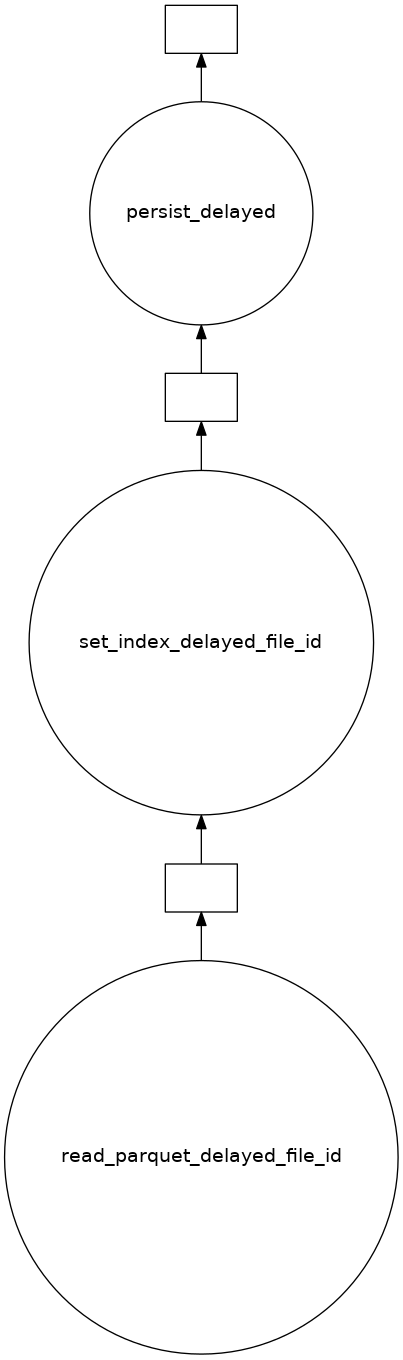

In [48]:
dask.delayed(delays).visualize()

In [49]:
res = client.compute(delays)

res

persist_delayed


<Future: pending, key: persist_delayed-acd2937e-2d24-492d-895a-ce9efd295080>

In [51]:
res

<Future: finished, type: dask.dataframe.core.DataFrame, key: persist_delayed-acd2937e-2d24-492d-895a-ce9efd295080>

In [52]:
res.result()

Dask DataFrame Structure:
                      index   proc   rank thread_id    cat io_cat   tstart     tend func_id  level hostname     app filename   size bandwidth duration   tmid proc_id
npartitions=1                                                                                                                                                        
-9210576409139474804  int64  int64  int32     int32  int32  int32  float32  float32  object  int32   object  object   object  int64   float32  float32  int64   int64
 9214005169356689175    ...    ...    ...       ...    ...    ...      ...      ...     ...    ...      ...     ...      ...    ...       ...      ...    ...     ...
Dask Name: sort_index, 1 tasks

In [28]:
ddf

<function __main__.persist_delayed(ddf: dask.dataframe.core.DataFrame)>

In [52]:
import dask.bag as db

b = db.from_sequence(range(5))

def add_to_set(acc, x):
    ''' Add new element x to set acc '''
    return acc | set([x])

b.fold(add_to_set, set.union, initial=set()).compute()

{0, 1, 2, 3, 4}

In [68]:
b.fold(lambda x, y: x | set([y, y+1]), set.union, initial=set(), out_type=db.Bag).map(lambda x: print(x)).compute()

[None, None, None, None, None, None]

In [77]:
list(b.map(lambda x: x * 10))

[0, 10, 20, 30, 40]

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took